In [1]:
"""
This code is meant to work with raw kinetic OD files pulled from the microplate reader. No adjustments need to be made in order for the program to work.
Author: David Dooley
Email: dools.d@gmail.com
Last Updated: 05/27/2021
"""

'\nThis code is meant to work with raw kinetic OD files pulled from the microplate reader. No adjustments need to be made in order for the program to work.\nAuthor: David Dooley\nEmail: dools.d@gmail.com\nLast Updated: 05/27/2021\n'

In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

In [6]:
###Import data
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()
df = pd.read_excel(file_path,header=27) #Save Excel data in dataframe
df.head(10) ### Preview dataframe

,Unnamed: 0,Time (hrs),T° 600,A1,A2,A3,Avg,A4,A5,A6,...,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95
0,NaN,0.00,37.0,0.106,0.104,0.103,0.104333,0.102,0.104,0.103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.25,37.0,0.108,0.107,0.106,0.107000,0.104,0.107,0.106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.50,37.0,0.112,0.110,0.109,0.110333,0.109,0.111,0.110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.75,37.0,0.117,0.115,0.113,0.115000,0.115,0.118,0.117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.00,37.0,0.125,0.123,0.119,0.122333,0.124,0.127,0.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.25,37.0,0.135,0.133,0.128,0.132000,0.138,0.138,0.139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.50,37.0,0.149,0.148,0.139,0.145333,0.157,0.156,0.158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1.75,37.0,0.166,0.167,0.155,0.162667,0.182,0.179,0.183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2.00,37.0,0.189,0.192,0.176,0.185667,0.215,0.209,0.214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2.25,37.0,0.218,0.226,0.202,0.215333,0.255,0.250,0.256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
""" Perform initial trims """
idx = next((idx for idx, val in enumerate(df['Unnamed: 0']) if val == "Results"), len(df.index)) ### Find index of row that has "Results" in first column
df = df.iloc[:idx] ### Drop all rows from "Results" and below
df = df.dropna(how='all',axis='columns') #Remove columns with no data
df = df.dropna() ### Remove rows with no data

In [11]:
###Convert time to decimal hours format (only works for <24h run)
for i,item in enumerate(df['Time (hrs)']):
    temp = dt.time.fromisoformat(str(df['Time (hrs)'].iloc[i]))
    df['Time (hrs)'].iloc[i] = float(temp.hour + (temp.minute/60))

ValueError: Invalid isoformat string: '0.0'

In [12]:
###Enter blank columns
print(df.head(10)) #Show data to aid in column selection

b = input("\nEnter any blank columns in a comma-separated list: ")
if not b.split():
    pass
else:
    for ind in b.split(","):
        if ind != " " or ind != "":
            ind = ind.strip()
            df = df.drop([ind], axis='columns')
        else:
            pass

   Time (hrs)  T° 600     A1     A2     A3       Avg     A4     A5     A6  \
0        0.00    37.0  0.106  0.104  0.103  0.104333  0.102  0.104  0.103   
1        0.25    37.0  0.108  0.107  0.106  0.107000  0.104  0.107  0.106   
2        0.50    37.0  0.112  0.110  0.109  0.110333  0.109  0.111  0.110   
3        0.75    37.0  0.117  0.115  0.113  0.115000  0.115  0.118  0.117   
4        1.00    37.0  0.125  0.123  0.119  0.122333  0.124  0.127  0.125   
5        1.25    37.0  0.135  0.133  0.128  0.132000  0.138  0.138  0.139   
6        1.50    37.0  0.149  0.148  0.139  0.145333  0.157  0.156  0.158   
7        1.75    37.0  0.166  0.167  0.155  0.162667  0.182  0.179  0.183   
8        2.00    37.0  0.189  0.192  0.176  0.185667  0.215  0.209  0.214   
9        2.25    37.0  0.218  0.226  0.202  0.215333  0.255  0.250  0.256   

      Avg.1  ...     E9    Avg.10    E10    E11    E12    Avg.11    H10  \
0  0.103000  ...  0.107  0.107000  0.108  0.110  0.108  0.108667  0.098   
1 

KeyError: "['B1'] not found in axis"

In [112]:
###Enter data series
series_bool = True
legend_names = []
names=[]
while series_bool:
    ans = str(input("\nWould you like to add a data series? "))
    if (ans == "yes" or ans == "y" or ans == "Y" or ans == "Yes" or ans == "YES"):
        data = []
        name = input("\nEnter the name for this data series: ")
        d = input("\nEnter the column(s) containing OD data for this series (separated by commas if in replicates): ")
        for ind in d.split(","):
            data.append(ind.strip())
        if len(d) > 1:
            df[name+'_avg']=df.loc[:,data].mean(axis=1) #Average duplicates, triplicates, etc.
            names.append(name+'_avg') #Save name of series to list
            legend_names.append(name)
        else:
            df[name+'_avg']=df[data]
    else:
        series_bool = False

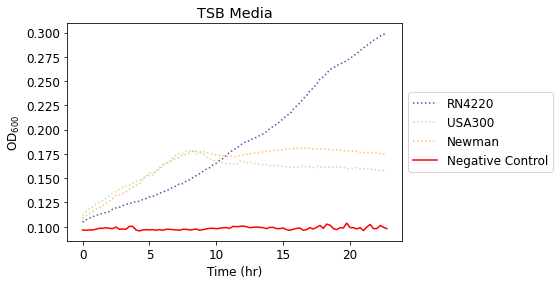

In [113]:
""" Plotting and Formatting """
fig, ax1 = plt.subplots() ### Initialize plot
df.plot(x='Time (hrs)', y=names, cmap ='Spectral_r', ax=ax1) ### Populate plot
ax1.set_xlabel("Time (hr)")
ax1.set_ylabel("OD$_{600}$")
ax1.set_title("TSB Media")
ax1.legend(legend_names, loc='center left', bbox_to_anchor=(1,0.5))
plt.rcParams.update({'font.size': 12}) ### Make font size bigger

""" Uncomment this section if you want to alter the individual color and line type of data series"""
#################################################################################################
#################################################################################################
# change_list = ""
# change_list = input("\nWhich of the following data series do you want to edit (separate by commas if multiple, or type 'all' to edit all series)?\n\n%s" % names)
# if change_list == "all":
#     for line in ax1.get_lines():
#         name = line.get_label()
#         color = str(input("Specify a color for %s (ex. 'blue', 'red', 'green', etc.): " % name))
#         if color != "":
#             line.set_color(color)
#         line_style = str(input("Specify a line style for %s (ex. 'solid', 'dashed', 'dashdot', 'dotted', or 'None'): " % name))
#         if line_style != "":
#             line.set_linestyle(line_style)
#         line_width = input("Specify a line width in points for %s (default is 1.5): " % name)
#         if line_width != "":
#             line.set_linewidth(float(line_width))
#     ax1.legend(legend_names, loc='center left', bbox_to_anchor=(1,0.5))
# elif (change_list != "None" and change_list != ""):
#     for name in change_list.split(","):
#         name = name.strip()
#         line = [line for line in ax1.get_lines() if line.get_label() == name][0] ### Get appropriate data series
#         color = str(input("Specify a color for %s (ex. 'blue', 'red', 'green', etc.): " % name))
#         if color != "":
#             line.set_color(color)
#         line_style = str(input("Specify a line style for %s (ex. 'solid', 'dashed', 'dashdot', 'dotted', or 'None'): " % name))
#         if line_style != "":
#             line.set_linestyle(line_style)
#         line_width = input("Specify a line width in points for %s (default is 1.5): " % name)
#         if line_width != "":
#             line.set_linewidth(float(line_width))
#     ax1.legend(legend_names, loc='center left', bbox_to_anchor=(1,0.5))
# else:
#     pass
#################################################################################################
#################################################################################################


plt.show()

In [115]:
ax1.set_title("TSB 0.1x Chloramphenicol Media")

Text(0.5, 1.0, 'TSB 0.1x Chloramphenicol Media')

In [116]:
plot_name = input('\nSave figure as: ')
fig.savefig(plot_name, bbox_inches = 'tight', dpi=500)